In [1]:
# pip install numpy

In [2]:
# pip install numpy --upgrade

In [3]:
# !pip uninstall -y numpy
# !pip uninstall -y setuptools
# !pip install setuptools
# !pip install numpy

In [4]:
# !pip install numpy==1.23.1

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# df = web.DataReader('TCS',data_source='yahoo', start='2021-01-01',end='2022-12-20')
# df
data=pd.read_csv("C:/Users/papachampu/Desktop/Mini/30-09-2022-TO-28-12-2022TCSALLN.csv")
data

Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0     TCS     EQ  30-Sep-2022     2997.30     2990.85     3019.70    2950.10   
1     TCS     BL  03-Oct-2022     3365.05     3004.55     3004.55    3004.55   
2     TCS     EQ  03-Oct-2022     3004.55     2995.00     3020.70    2974.00   
3     TCS     EQ  04-Oct-2022     2984.95     3029.95     3098.00    3023.00   
4     TCS     EQ  06-Oct-2022     3091.15     3111.00     3124.00    3092.45   
..    ...    ...          ...         ...         ...         ...        ...   
59    TCS     EQ  22-Dec-2022     3268.55     3294.00     3294.00    3245.10   
60    TCS     EQ  23-Dec-2022     3259.70     3217.00     3266.85    3217.00   
61    TCS     EQ  26-Dec-2022     3228.35     3228.35     3272.00    3225.05   
62    TCS     EQ  27-Dec-2022     3252.90     3269.20     3273.80    3231.50   
63    TCS     EQ  28-Dec-2022     3259.50     3249.80     3266.10    3226.00   

    Last Price  Close Price  Average Price  Total Traded Quantity  \
0      3007.45      3004.55        2983.20                2817353   
1      3004.55      3004.55        3004.55                1154754   
2      2988.00      2984.95        2994.74                1763331   
3      3097.00      3091.15        3072.95                2145875   
4      3093.00      3101.95        3107.06                1790816   
..         ...          ...            ...                    ...   
59     3255.00      3259.70        3260.93                1384101   
60     3231.00      3228.35        3239.40                1360281   
61     3254.00      3252.90        3257.13                 870157   
62     3262.00      3259.50        3251.33                 835883   
63     3258.00      3257.10        3249.31                 910795   

        Turnover  No. of Trades  
0   8.404726e+09         171103  
1   3.469516e+09              1  
2   5.280709e+09         107448  
3   6.594169e+09         124233  
4   5.564164e+09         119572  
..           ...            ...  
59  4.513452e+09          97031  
60  4.406496e+09         114542  
61  2.834217e+09          73081  
62  2.717729e+09          69823  
63  2.959455e+09          72613  

[64 rows x 13 columns]

In [3]:
data.shape

(64, 13)

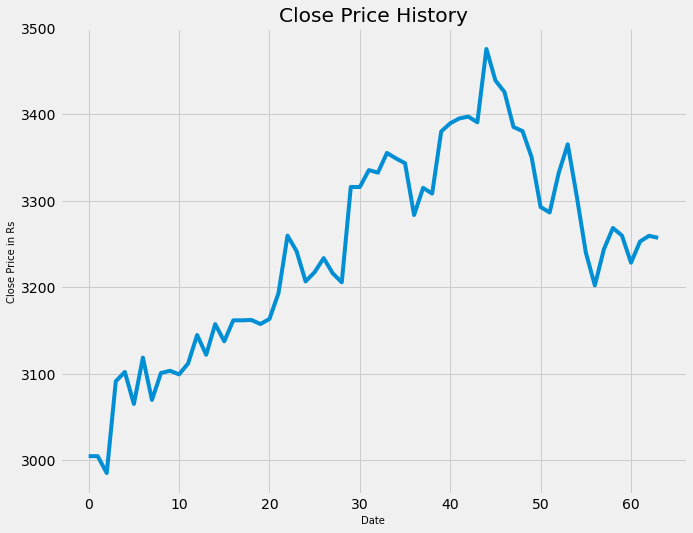

In [4]:
plt.figure(figsize=(10,8))
plt.title('Close Price History')
plt.plot(data['Close Price'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price in Rs', fontsize=10)
plt.show()

In [5]:
data1 = data.filter(['Close Price'])
dataset = data1.values
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

52

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03994294],
       [0.03994294],
       [0.        ],
       [0.21642551],
       [0.23843489],
       [0.16293051],
       [0.27226411],
       [0.17240677],
       [0.2359894 ],
       [0.24118606],
       [0.23272875],
       [0.25840636],
       [0.32555533],
       [0.2789892 ],
       [0.35123293],
       [0.31067862],
       [0.36019971],
       [0.36019971],
       [0.36101488],
       [0.35143672],
       [0.36335847],
       [0.42429183],
       [0.55991441],
       [0.52323212],
       [0.45200734],
       [0.47371103],
       [0.50692888],
       [0.47095985],
       [0.44976564],
       [0.67454657],
       [0.67454657],
       [0.71438761],
       [0.70847768],
       [0.75484002],
       [0.74189933],
       [0.73058895],
       [0.60841655],
       [0.67250866],
       [0.65895659],
       [0.80538007],
       [0.82474017],
       [0.83615244],
       [0.84043204],
       [0.82708376],
       [1.        ],
       [0.92561647],
       [0.89861422],
       [0.815

In [7]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 20:
        print(x_train)
        print(y_train)
        print()

[array([0.03994294, 0.03994294, 0.        , 0.21642551, 0.23843489,
       0.16293051, 0.27226411, 0.17240677, 0.2359894 , 0.24118606,
       0.23272875, 0.25840636, 0.32555533, 0.2789892 , 0.35123293,
       0.31067862, 0.36019971, 0.36019971, 0.36101488, 0.35143672])]
[0.36335846749541467]



In [8]:
x_train , y_train = np.array(x_train), np.array(y_train) 

In [9]:
x_train.shape

(32, 20)

In [10]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(32, 20, 1)

In [11]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

32/32 [==============================] - 34s 39ms/step - loss: 0.0836


In [27]:
#Create the testing  data set
#Create a new array containing scaled values from index 32 to 50
test_data = scaled_data[training_data_len - 10: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])

In [28]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [29]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [30]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 6s 6s/step


In [31]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.783357747395865

<ipython-input-33-10c02fc331a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


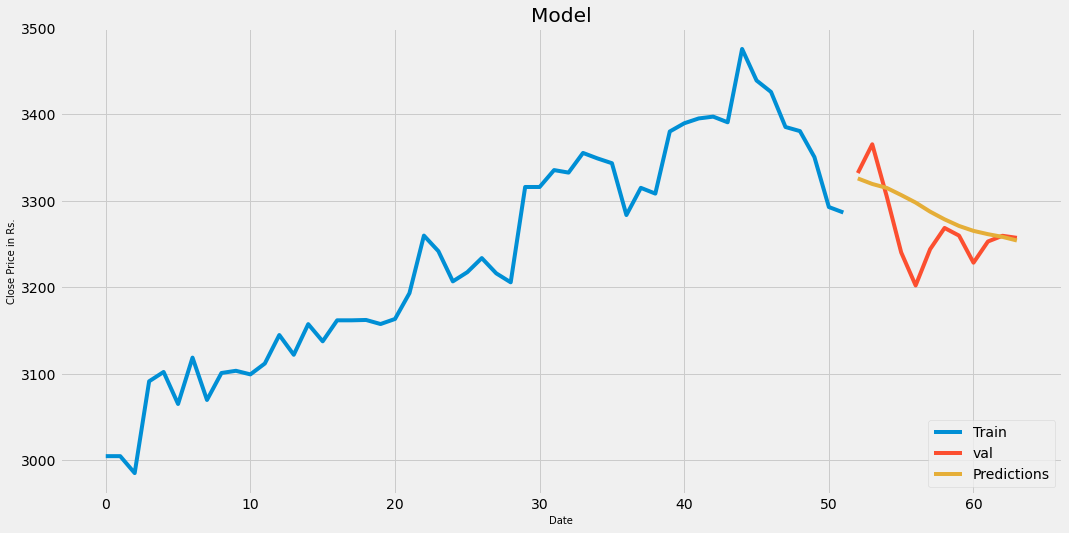

In [33]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in Rs.',fontsize=10)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price','Predictions']])
plt.legend(['Train','val','Predictions'], loc='lower right')
plt.show()
